In [ ]:
import pandas as pd
import numpy as np

In [ ]:
messages = pd.DataFrame(columns=["Date","Info"])

In [ ]:
def import_inventory(messages):
  inFile= open("PBI.txt","r")
  inventory_lines= inFile.readlines()
  for line in inventory_lines:
    items = line.lower().split("-",1)
    if len(items)==2:
      messages.loc[messages.shape[0]] = items
    else:
      messages.loc[messages.shape[0]] = items.insert(0,"")

In [ ]:
import_inventory(messages)

In [ ]:
messages

In [ ]:
df=messages

In [ ]:
df[['Date', 'Time']] = df['Date'].str.split(' ',n=1, expand=True)

In [ ]:
df[['Author', 'Message']] = df['Info'].str.split(':',n=1, expand=True)

In [ ]:
df_grouped=df.groupby("Author").count()

In [ ]:
df_grouped.head()

In [ ]:
real_authors=df_grouped[df_grouped["Message"]>100].index.tolist()
print(real_authors)

In [ ]:
df_grouped[df_grouped["Message"]<50]

In [ ]:
df[~df["Author"].isin(real_authors)]

In [ ]:
df=df.dropna(how="all")

In [ ]:
df=df[df["Author"].isin(real_authors)]

NameError: ignored

In [ ]:
df.head()

NameError: ignored

In [ ]:
df=df[["Date", "Time","Author","Message"]]

In [ ]:
df.head()

,Date,Time,Author,Message
0,13.06.2021,15:19,memin,<medya dahil edilmedi>\n
1,13.06.2021,15:21,siberfati,ndmdmdkxkxkdkdkckf\n
2,13.06.2021,18:19,memin,<medya dahil edilmedi>\n
3,13.06.2021,20:29,siberfati,la az once\n
4,13.06.2021,20:29,siberfati,bi cep telefonu aradi\n


In [ ]:
df.describe()

,Date,Time,Author,Message
count,39989,39989,39989,39989
unique,416,1241,5,31545
top,9.01.2022,14:01,siberfati,<medya dahil edilmedi>\n
freq,844,101,14033,2649


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129320 missing from current font.
  font.set_text(s, 0, flags=flags)


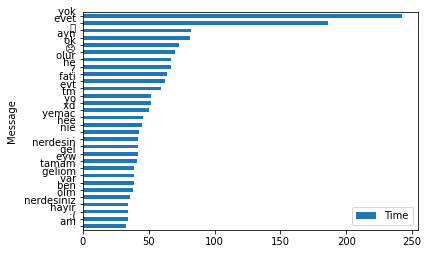

In [ ]:
df.groupby("Message").count().sort_values("Time", ascending= False).iloc[30:0:-1,:].plot.barh(y="Time", )

In [ ]:
ax = sns.barplot(x="Ay", y="msg", data=df.groupby("Message").count().sort_values("Time", ascending= False).iloc[30:0:-1,:])

NameError: ignored

In [ ]:
df["message_len"]=df["Message"].str.len()

In [ ]:
df.head()

,Date,Time,Author,Message,message_len
0,13.06.2021,15:19,memin,<medya dahil edilmedi>\n,24
1,13.06.2021,15:21,siberfati,ndmdmdkxkxkdkdkckf\n,20
2,13.06.2021,18:19,memin,<medya dahil edilmedi>\n,24
3,13.06.2021,20:29,siberfati,la az once\n,12
4,13.06.2021,20:29,siberfati,bi cep telefonu aradi\n,23


In [ ]:
df_average=df.groupby("Author").mean()

In [ ]:
df_average.head()

,message_len
Author,
aly tarık,20.986884
berat düzenli,28.234355
memin,21.376179
oxan,21.782886
siberfati,23.611131


In [ ]:
df_dist=df[df["Message"].str.contains("<medya dahil edilmedi>\n")==False].groupby(["Author","message_len"]).count()

In [ ]:
df_dist

Date  Time  Message
Author     message_len                     
 aly tarık 3              49    49       49
           4             126   126      126
           5             148   148      148
           6              85    85       85
           7             137   137      137
...                      ...   ...      ...
 siberfati 489             1     1        1
           503             1     1        1
           522             1     1        1
           587             1     1        1
           875             1     1        1

[643 rows x 3 columns]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

[(0.0, 100.0)]

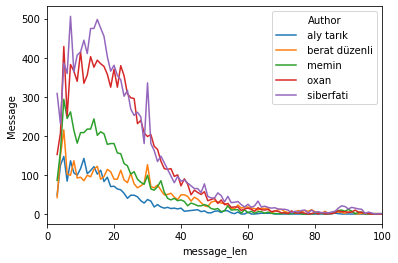

In [ ]:
ax = sns.lineplot(x="message_len", y="Message", hue="Author", data=df_dist)
ax.set(xlim=(0, 100))

In [ ]:
df_no_media=df[df["Message"].str.contains("<medya dahil edilmedi>\n")==False]

In [ ]:
df_no_media.groupby("Author").sum().head()

,message_len
Author,
aly tarık,56029
berat düzenli,124125
memin,123990
oxan,246861
siberfati,307383


In [ ]:
df.head()

,Date,Time,Author,Message,message_len
0,13.06.2021,15:19,memin,<medya dahil edilmedi>\n,24
1,13.06.2021,15:21,siberfati,ndmdmdkxkxkdkdkckf\n,20
2,13.06.2021,18:19,memin,<medya dahil edilmedi>\n,24
3,13.06.2021,20:29,siberfati,la az once\n,12
4,13.06.2021,20:29,siberfati,bi cep telefonu aradi\n,23


In [ ]:
df["Conversation"]=0

In [ ]:
df.head()

,Date,Time,Author,Message,message_len,Conversation
0,13.06.2021,15:19,memin,<medya dahil edilmedi>\n,24,0
1,13.06.2021,15:21,siberfati,ndmdmdkxkxkdkdkckf\n,20,0
2,13.06.2021,18:19,memin,<medya dahil edilmedi>\n,24,0
3,13.06.2021,20:29,siberfati,la az once\n,12,0
4,13.06.2021,20:29,siberfati,bi cep telefonu aradi\n,23,0


In [ ]:
print(df.shape)
print(df.dtypes)

(39989, 6)
Date            object
Time            object
Author          object
Message         object
message_len      int64
Conversation     int64
dtype: object


In [ ]:
df.head()

,Date,Time,Author,Message,message_len,Conversation,date_parsed
0,13.06.2021,15:19,memin,<medya dahil edilmedi>\n,24,0,2021-06-13
1,13.06.2021,15:21,siberfati,ndmdmdkxkxkdkdkckf\n,20,0,2021-06-13
2,13.06.2021,18:19,memin,<medya dahil edilmedi>\n,24,0,2021-06-13
3,13.06.2021,20:29,siberfati,la az once\n,12,0,2021-06-13
4,13.06.2021,20:29,siberfati,bi cep telefonu aradi\n,23,0,2021-06-13


In [ ]:
messages.head()

,Date,Info,Time,Author,Message
0,13.06.2021,memin: <medya dahil edilmedi>\n,15:19,memin,<medya dahil edilmedi>\n
1,13.06.2021,siberfati: ndmdmdkxkxkdkdkckf\n,15:21,siberfati,ndmdmdkxkxkdkdkckf\n
2,13.06.2021,memin: <medya dahil edilmedi>\n,18:19,memin,<medya dahil edilmedi>\n
3,13.06.2021,siberfati: la az once\n,20:29,siberfati,la az once\n
4,13.06.2021,siberfati: bi cep telefonu aradi\n,20:29,siberfati,bi cep telefonu aradi\n


In [ ]:
df_x=messages[["Author","Message","Date","Time"]].dropna(how="all")
df_x["DateTime"]=df_x["Date"]+ " " +df["Time"]
df_x=df_x[df_x["Author"].isin(real_authors)]

In [ ]:
df_x.head()

,Author,Message,Date,Time,DateTime
0,memin,<medya dahil edilmedi>\n,13.06.2021,15:19,13.06.2021 15:19
1,siberfati,ndmdmdkxkxkdkdkckf\n,13.06.2021,15:21,13.06.2021 15:21
2,memin,<medya dahil edilmedi>\n,13.06.2021,18:19,13.06.2021 18:19
3,siberfati,la az once\n,13.06.2021,20:29,13.06.2021 20:29
4,siberfati,bi cep telefonu aradi\n,13.06.2021,20:29,13.06.2021 20:29


In [ ]:
df_x["Date_parsed"]=pd.to_datetime(df_x["DateTime"], infer_datetime_format=True) 
df_x=df_x.reset_index(drop=True)
df_x.head()
df_x.tail()

,Author,Message,Date,Time,DateTime,Date_parsed
39984,siberfati,ders calisiom asko\n,5.08.2022,16:38,5.08.2022 16:38,2022-08-05 16:38:00
39985,oxan,memin senden avrsa sen at\n,5.08.2022,16:38,5.08.2022 16:38,2022-08-05 16:38:00
39986,memin,kaç mb olur dosya\n,5.08.2022,16:40,5.08.2022 16:40,2022-08-05 16:40:00
39987,aly tarık,2.4\n,5.08.2022,16:40,5.08.2022 16:40,2022-08-05 16:40:00
39988,siberfati,4\n,5.08.2022,16:40,5.08.2022 16:40,2022-08-05 16:40:00


In [ ]:
df_x["diff"]=df_x["Date_parsed"].diff()
df_x["int_diff"]=df_x["diff"].astype(int)
df_x = df_x.iloc[1: , :]
df_x["int_diff"]/=60000000000
df_x.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Author,Message,Date,Time,DateTime,Date_parsed,diff,int_diff
1,siberfati,ndmdmdkxkxkdkdkckf\n,13.06.2021,15:21,13.06.2021 15:21,2021-06-13 15:21:00,0 days 00:02:00,2.0
2,memin,<medya dahil edilmedi>\n,13.06.2021,18:19,13.06.2021 18:19,2021-06-13 18:19:00,0 days 02:58:00,178.0
3,siberfati,la az once\n,13.06.2021,20:29,13.06.2021 20:29,2021-06-13 20:29:00,0 days 02:10:00,130.0
4,siberfati,bi cep telefonu aradi\n,13.06.2021,20:29,13.06.2021 20:29,2021-06-13 20:29:00,0 days 00:00:00,0.0
5,siberfati,diyo ic isleri bakanligi onemle duyurur\n,13.06.2021,20:29,13.06.2021 20:29,2021-06-13 20:29:00,0 days 00:00:00,0.0


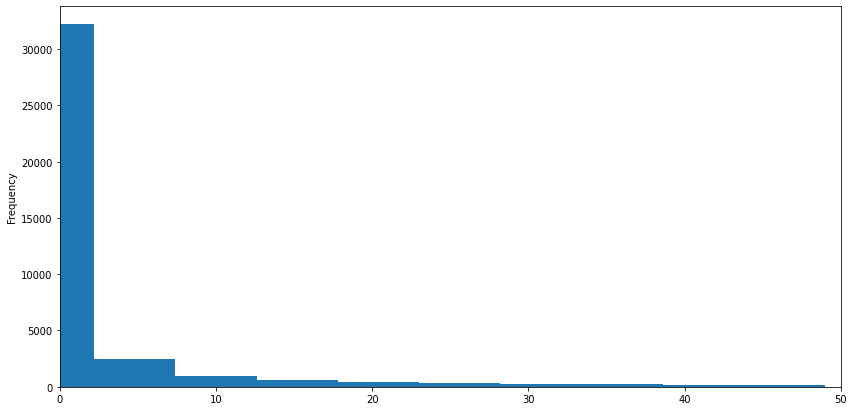

In [ ]:
df_x[df_x["int_diff"]<50]["int_diff"].plot.hist(bins=10,xlim=(0,50), figsize=(14,7))

## new conversation parameter burda

In [ ]:
df_x["new_conv"]=df_x["int_diff"]>=20 
df_x["new_conv"] = df_x["new_conv"].astype(int)
df_x.head()

,Author,Message,Date,Time,DateTime,Date_parsed,diff,int_diff,new_conv
1,siberfati,ndmdmdkxkxkdkdkckf\n,13.06.2021,15:21,13.06.2021 15:21,2021-06-13 15:21:00,0 days 00:02:00,2.0,0
2,memin,<medya dahil edilmedi>\n,13.06.2021,18:19,13.06.2021 18:19,2021-06-13 18:19:00,0 days 02:58:00,178.0,1
3,siberfati,la az once\n,13.06.2021,20:29,13.06.2021 20:29,2021-06-13 20:29:00,0 days 02:10:00,130.0,1
4,siberfati,bi cep telefonu aradi\n,13.06.2021,20:29,13.06.2021 20:29,2021-06-13 20:29:00,0 days 00:00:00,0.0,0
5,siberfati,diyo ic isleri bakanligi onemle duyurur\n,13.06.2021,20:29,13.06.2021 20:29,2021-06-13 20:29:00,0 days 00:00:00,0.0,0


In [ ]:
df_x=df_x[["Author","new_conv"]]
df_x["Conversation"] = df_x["new_conv"].cumsum()
df_x=df_x.drop(["new_conv"],axis=1)
df_x.head()

,Author,Conversation
1,siberfati,0
2,memin,1
3,siberfati,2
4,siberfati,2
5,siberfati,2


In [ ]:
interaction = pd.DataFrame(columns=["siberfati","memin", "oxan","aly tarık","berat düzenli"])

In [ ]:
df_conv=df_x
df_conv.head()

,Author,Conversation
1,siberfati,0
2,memin,1
3,siberfati,2
4,siberfati,2
5,siberfati,2


In [ ]:
df_conv_unique= df_conv.drop_duplicates()
df_conv_unique=pd.get_dummies(df_conv_unique)
df_conv_unique.head()

,Conversation,Author_ aly tarık,Author_ berat düzenli,Author_ memin,Author_ oxan,Author_ siberfati
1,0,0,0,0,0,1
2,1,0,0,1,0,0
3,2,0,0,0,0,1
6,2,0,0,0,1,0
22,2,0,0,1,0,0


In [ ]:
df_conv_unique=pd.get_dummies(df_conv_unique).groupby("Conversation").sum()
df_conv_unique.head()

,Author_ aly tarık,Author_ berat düzenli,Author_ memin,Author_ oxan,Author_ siberfati
Conversation,,,,,
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,1,1,1
3,1,0,0,0,0
4,0,1,0,1,1


In [ ]:
for num,author in enumerate(df_conv_unique.columns,1):
  df_conv_unique[author]*=num
df_conv_unique.head()

,Author_ aly tarık,Author_ berat düzenli,Author_ memin,Author_ oxan,Author_ siberfati
Conversation,,,,,
0,0,0,0,0,5
1,0,0,3,0,0
2,0,0,3,4,5
3,1,0,0,0,0
4,0,2,0,4,5


In [ ]:
df_edges = pd.DataFrame(columns=["first","second"])

for author in df_conv_unique.columns:
  for author2 in df_conv_unique.columns:

    df_temp = df_conv_unique[df_conv_unique[author]!=0][[author,author2]]

    df_temp.columns=["first","second"]

    df_edges = pd.concat([df_edges, df_temp ],ignore_index=True)

df_edges = df_edges[df_edges["second"]!=0]

In [ ]:
output = df_edges[df_edges["first"]!=df_edges["second"]]
output = output[output["second"]!=0]
output = output.set_index("first")

In [ ]:
from google.colab import files

output.to_csv('df_edges.csv')
files.download('df_edges.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>